In [1]:
import matplotlib.pyplot as plt
import numpy as np
import emachine as EM
import itertools

In [2]:
np.random.seed(0)

In [3]:
n_var = 20

g = 0.5
n_seq = 10000

In [4]:
# Synthetic data are generated by using `generate_seq`.
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)
ops = EM.operators(seqs)
print(ops.shape)

(10000, 210)


In [5]:
# predict interactions w
eps_list = np.linspace(0.1,0.9,9)
n_eps = len(eps_list)
#res = Parallel(n_jobs = n_eps)(delayed(EM.fit)(ops,eps=eps,max_iter=100) for eps in eps_list)
#w_eps = np.array([res[i][0] for i in range(len(res))])
#e_eps = np.array([res[i][1] for i in range(len(res))])

e_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):
    w_eps[i,:],e_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    print('eps and e_eps:',eps,e_eps[i])

eps: 0.1
eps and e_eps: 0.1 -2.8332191695951807
eps: 0.2
eps and e_eps: 0.2 -2.758403286267404
eps: 0.30000000000000004
eps and e_eps: 0.30000000000000004 -2.7203562913985633
eps: 0.4
eps and e_eps: 0.4 -2.7064001142339102
eps: 0.5
eps and e_eps: 0.5 -2.711997415376605
eps: 0.6
eps and e_eps: 0.6 -2.7376794064981476
eps: 0.7000000000000001
eps and e_eps: 0.7000000000000001 -2.7882956059390938
eps: 0.8
eps and e_eps: 0.8 -2.8749758796979514
eps: 0.9
eps and e_eps: 0.9 -3.0237419268454384


In [7]:
# energy as function of eps
energy = -ops.dot(w_eps.T)
energy_av = energy.mean(axis=0)

In [8]:
# all possible configurations
seq_all = np.asarray(list(itertools.product([1.0, -1.0], repeat=n_var)))
n_possibles = seq_all.shape[0]
print('number of possible configs:',n_possibles)
print(seq_all.shape)

ops_all = EM.operators(seq_all)
print(ops_all.shape)

# logZ
energy_all = -ops_all.dot(w_eps.T)
prob_all = np.exp(-energy_all)
logZ = np.log(prob_all.sum(axis=0))

number of possible configs: 1048576
(1048576, 20)
(1048576, 210)


In [9]:
# Kullback-Leibler Divergence 
D_KL = energy_av + logZ

In [14]:
# MSE
MSE = ((w_true[np.newaxis,:] - w_eps)**2).mean(axis=1)

In [20]:
# logZ_true
energy_all_true = -ops_all.dot(w_true.T)
prob_all_true = np.exp(-energy_all_true)
logZ_true = np.log(prob_all_true.sum(axis=0))
print('logZ_true:',logZ_true)

logZ_true: 15.203385326641719


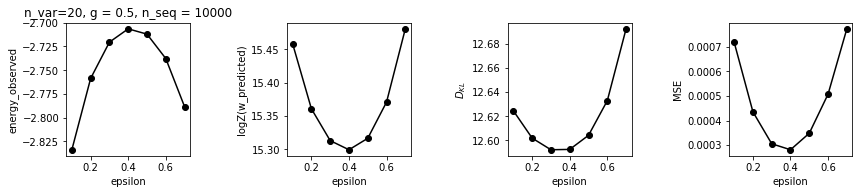

In [21]:
eps = np.linspace(0.1,0.9,9)
cut = -2

nx,ny = 4,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3,ny*2.8))
ax[0].plot(eps[:cut],energy_av[:cut],'ko-')
ax[1].plot(eps[:cut],logZ[:cut],'ko-')
#ax[1].plot([eps[0],eps[cut-1]],[logZ_true,logZ_true],'r--')

ax[2].plot(eps[:cut],D_KL[:cut],'ko-')
ax[3].plot(eps[:cut],MSE[:cut],'ko-')

for i in range(nx):
    ax[i].set_xlabel('epsilon')

ax[0].set_ylabel('energy_observed')
ax[1].set_ylabel('logZ(w_predicted)')
ax[2].set_ylabel('$D_{KL}$')
ax[3].set_ylabel('MSE')

ax[0].set_title('n_var=%s, g = %s, n_seq = %s'%(n_var,g,n_seq))
plt.tight_layout(h_pad=0.7, w_pad=1.5)
#plt.savefig('fig_M20_g05_N100k.pdf', format='pdf', dpi=100)

In [22]:
# unobsered configurations:
def difference_2d_arrays(a1,a2):
    # find the difference between 2d arrays
    a1_rows = a1.view([('', a1.dtype)] * a1.shape[1])
    a2_rows = a2.view([('', a2.dtype)] * a2.shape[1])
    a3 = np.setdiff1d(a1_rows, a2_rows).view(a1.dtype).reshape(-1, a1.shape[1])
    return a3

In [24]:
seq_unobs = difference_2d_arrays(seq_all,seqs)
print(seq_unobs.shape)

(1039982, 20)


In [26]:
ops_unobs = EM.operators(seq_unobs)
print(ops_unobs.shape)

(1039982, 210)


In [27]:
# energy of unobserved configurations as function of eps
energy_unobs = -ops_unobs.dot(w_eps.T)
energy_unobs_av = energy_unobs.mean(axis=0)

Text(0, 0.5, 'energy_unobserved')

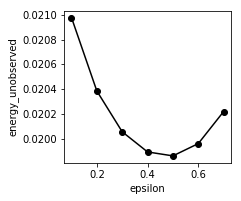

In [28]:
nx,ny = 1,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3,ny*2.8))
ax.plot(eps[:cut],energy_unobs_av[:cut],'ko-')
ax.set_xlabel('epsilon')
ax.set_ylabel('energy_unobserved')

#plt.tight_layout(h_pad=0.7, w_pad=1.5)

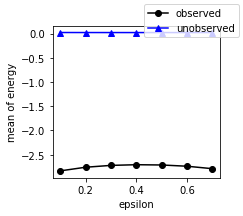

In [31]:
nx,ny = 1,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3,ny*2.8))
ax.plot(eps[:cut],energy_av[:cut],'ko-',label='observed')
ax.plot(eps[:cut],energy_unobs_av[:cut],'b^-',label='unobserved')
ax.set_xlabel('epsilon')
ax.set_ylabel('mean of energy')

fig.legend()

#plt.tight_layout(h_pad=0.7, w_pad=1.5)